In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# 日本語フォントの設定 macOSの場合
plt.rcParams['font.family'] = 'Hiragino Sans'
plt.rcParams['axes.unicode_minus'] = False

# 警告を無視
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# データ作成
data = { #データの変数、内容を定義
    '年代': ['20代']*10 + ['40代']*10, # 20代、40代、10人ずつ
    '評価': [4, 5, 4, 3, 5, 4, 4, 5, 3, 4, 2, 3, 3, 2, 4, 3, 2, 3, 3, 2]
}
df = pd.DataFrame(data) # pandasのDataFrameに変換

# データの表示
print(df) # 中身確認
print("\nデータの形状:", df.shape) # 改行しながらデータを表示

     年代  評価
0   20代   4
1   20代   5
2   20代   4
3   20代   3
4   20代   5
5   20代   4
6   20代   4
7   20代   5
8   20代   3
9   20代   4
10  40代   2
11  40代   3
12  40代   3
13  40代   2
14  40代   4
15  40代   3
16  40代   2
17  40代   3
18  40代   3
19  40代   2

データの形状: (20, 2)


In [3]:
df.describe()

,満足度
count,20.000000
mean,3.400000
std,0.994723
min,2.000000
25%,3.000000
50%,3.000000
75%,4.000000
max,5.000000


<Figure size 300x200 with 0 Axes>

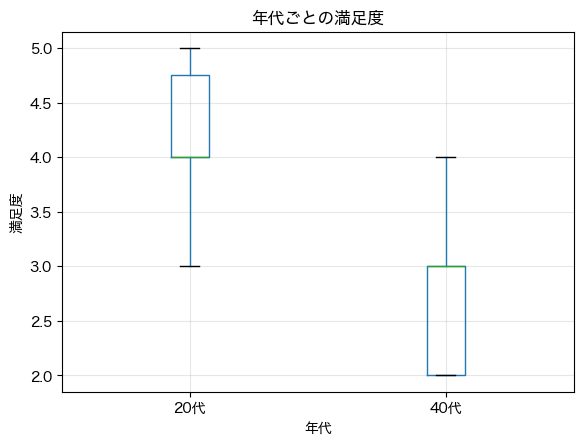

In [ ]:
# データの可視化
plt.figure(figsize=(3, 2))

# 箱ひげ図
df.boxplot(column='評価', by='年代') # column→縦軸、by→何に変えるか
plt.title('年代ごとの評価')
plt.suptitle('')  # デフォルトのタイトルを削除
plt.ylabel('評価')
plt.grid(True, alpha=0.3)
plt.show()

In [8]:
# Mann-Whitney U検定
twenty_scores = df[df['年代']=='20代']['評価']
forty_scores = df[df['年代']=='40代']['評価']

stat, p_value = stats.mannwhitneyu(twenty_scores, forty_scores, alternative='two-sided')
print(f"Mann-Whitney U検定の結果:")
print(f"U統計量: {stat}")
print(f"p値: {p_value:.4f}")
print(f"\n結果の解釈:")
if p_value < 0.05:
    print("p < 0.05: 20代、40代で評価に統計的に有意な差があります。")
else:
    print("p >= 0.05: 20代、40代で評価に統計的に有意な差はありません。")

# p値だけレポートに載せるで大丈夫
# サンプル数が多いと有意なさが出やすい

Mann-Whitney U検定の結果:
U統計量: 90.5
p値: 0.0016

結果の解釈:
p < 0.05: 20代、40代で評価に統計的に有意な差があります。
